Verify results from rex_nea_vs_fwhm.py

In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

from scipy.interpolate import RectBivariateSpline

In [2]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [3]:
band = 'g'
nea_path = '/global/cfs/cdirs/desi/users/rongpu/imaging_mc/nea/nea_vs_fwhm_{}_1024.fits'.format(band)

nea = Table(fitsio.read(nea_path))
nea_arr = np.array(nea['nea']).T

hdr = fitsio.read_header(nea_path, ext=1)
shape_r_grid = np.arange(hdr['R_MIN'], hdr['R_MAX']+hdr['R_DELTA'], hdr['R_DELTA'])
fwhm_grid = np.array(nea['fwhm_bin'])

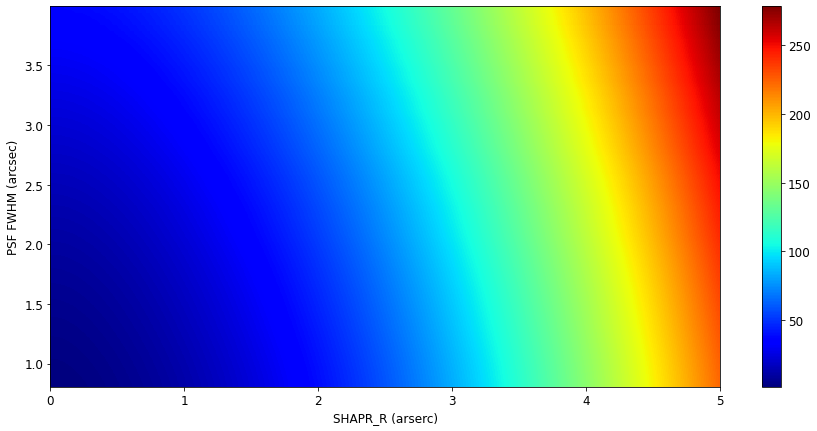

In [4]:
plt.figure(figsize=(15, 7))
plt.imshow(nea_arr.T, origin='lower', cmap='jet', aspect='auto',
           extent=[shape_r_grid.min(), shape_r_grid.max(), fwhm_grid.min(), fwhm_grid.max()])
plt.xlabel('SHAPR_R (arserc)')
plt.ylabel('PSF FWHM (arcsec)')
plt.colorbar()
plt.show()

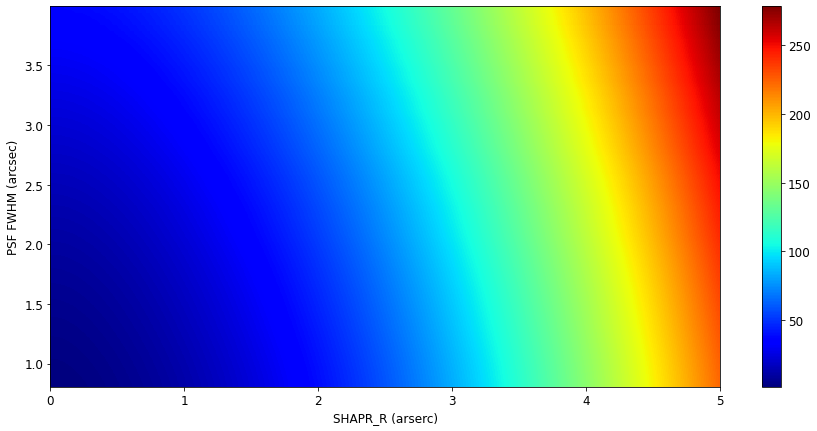

In [5]:
nea_model = RectBivariateSpline(shape_r_grid, fwhm_grid, nea_arr)

r_mesh, fwhm_mesh = np.meshgrid(shape_r_grid, fwhm_grid)
nea_predict = nea_model.ev(r_mesh.flatten(), fwhm_mesh.flatten())
nea_predict = nea_predict.reshape(fwhm_mesh.shape)

plt.figure(figsize=(15, 7))
plt.imshow(nea_predict, origin='lower', cmap='jet', aspect='auto',
           extent=[shape_r_grid.min(), shape_r_grid.max(), fwhm_grid.min(), fwhm_grid.max()])
plt.xlabel('SHAPR_R (arserc)')
plt.ylabel('PSF FWHM (arcsec)')
plt.colorbar()
plt.show()

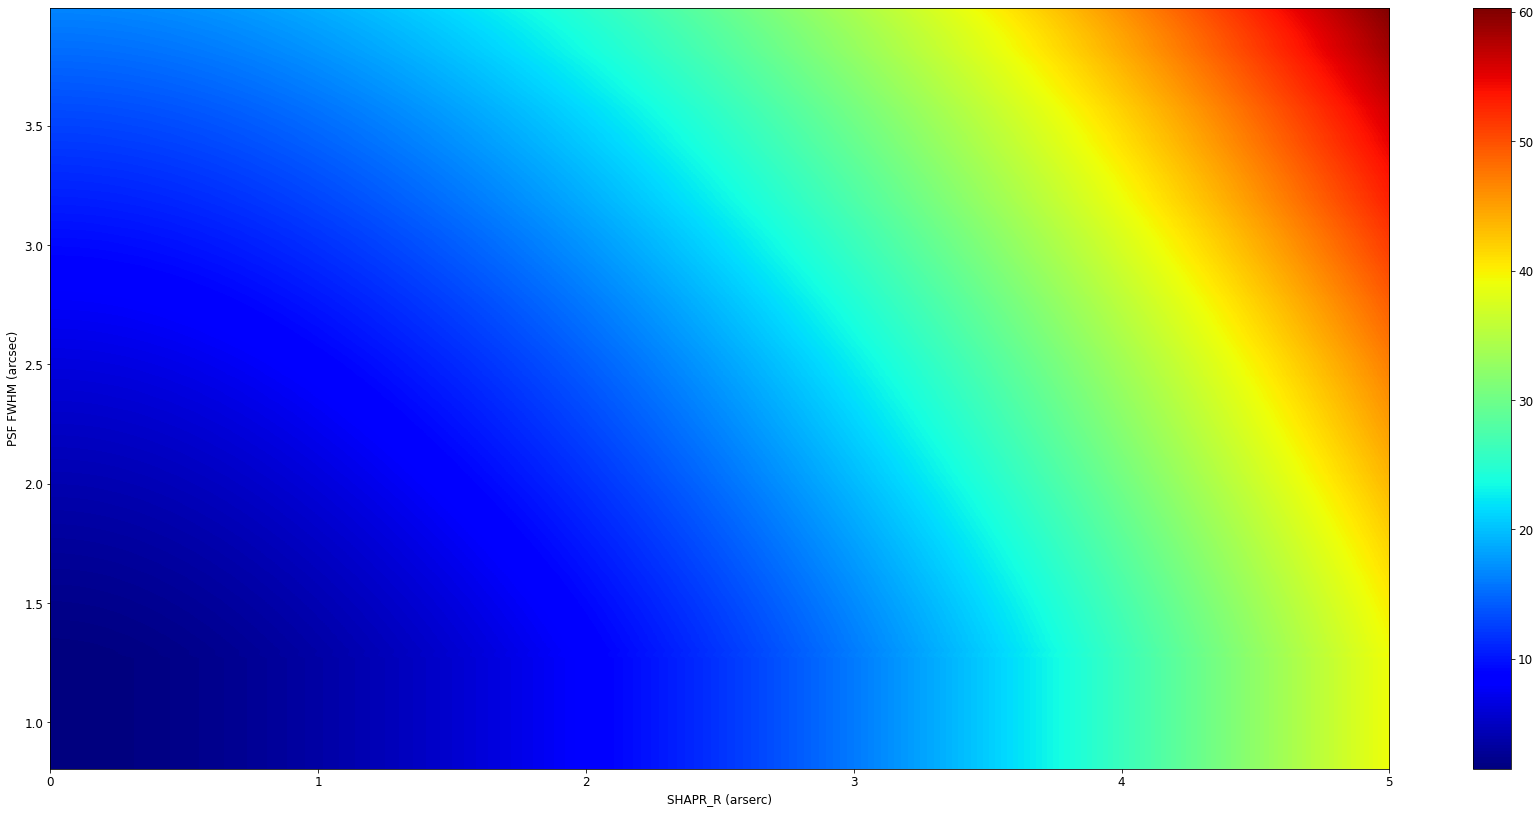

In [6]:
r_plot = np.arange(0., 2, 0.003)
fwhm_plot = np.arange(0.5, 2.6, 0.003)

r_mesh, fwhm_mesh = np.meshgrid(r_plot, fwhm_plot)

nea_predict = nea_model.ev(r_mesh.flatten(), fwhm_mesh.flatten())
nea_predict = nea_predict.reshape(fwhm_mesh.shape)

plt.figure(figsize=(30, 14))
plt.imshow(nea_predict, origin='lower', cmap='jet', aspect='auto',
           extent=[shape_r_grid.min(), shape_r_grid.max(), fwhm_grid.min(), fwhm_grid.max()])
plt.xlabel('SHAPR_R (arserc)')
plt.ylabel('PSF FWHM (arcsec)')
plt.colorbar()
plt.show()

In [7]:
get_nea = {}
for band in ['g', 'r', 'z']:
    nea_path = '/global/cfs/cdirs/desi/users/rongpu/imaging_mc/nea/nea_vs_fwhm_{}_1024.fits'.format(band)
    nea = Table(fitsio.read(nea_path))
    nea_arr = np.array(nea['nea']).T
    hdr = fitsio.read_header(nea_path, ext=1)
    shape_r_grid = np.arange(hdr['R_MIN'], hdr['R_MAX']+hdr['R_DELTA'], hdr['R_DELTA'])
    fwhm_grid = np.array(nea['fwhm_bin'])
    get_nea[band] = RectBivariateSpline(shape_r_grid, fwhm_grid, nea_arr).ev

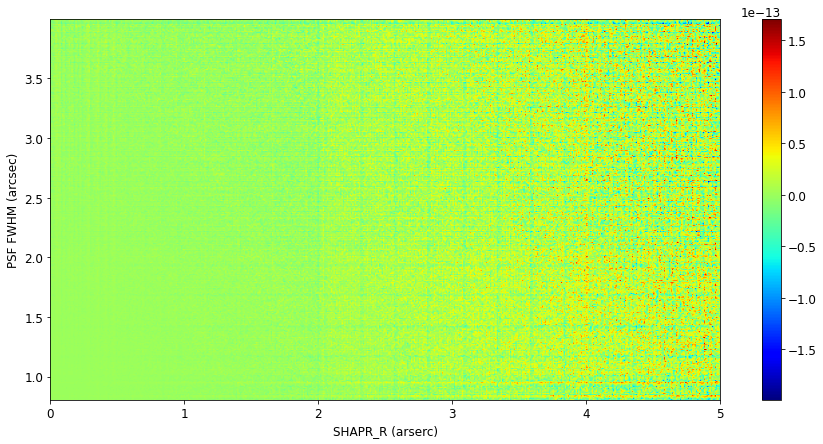

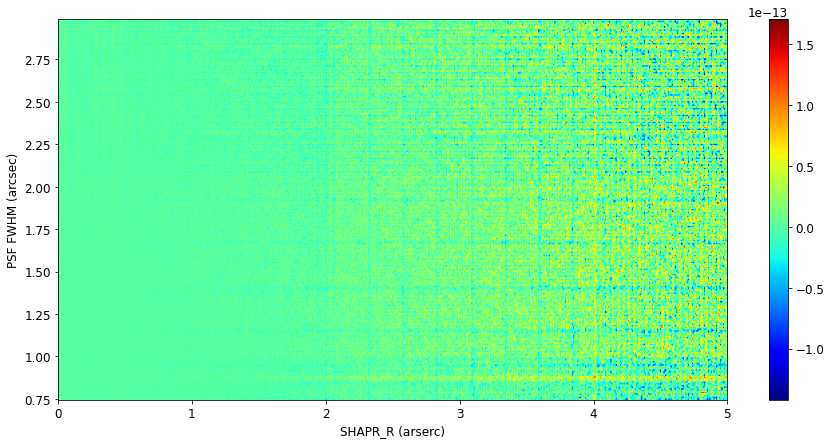

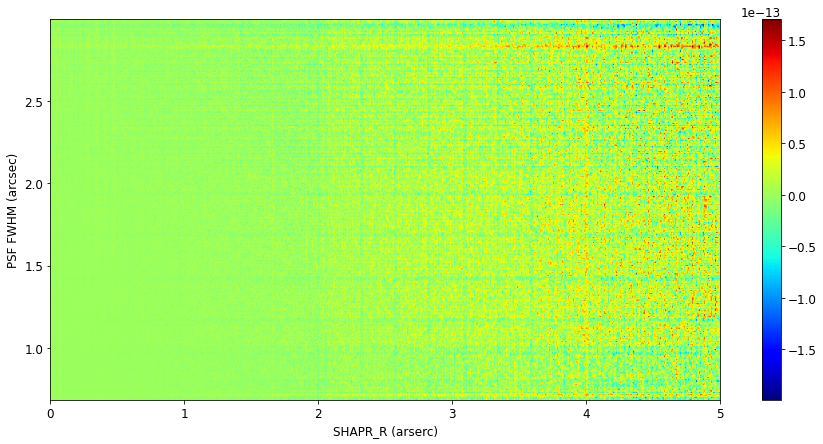

In [8]:
for band in ['g', 'r', 'z']:
    nea_path = '/global/cfs/cdirs/desi/users/rongpu/imaging_mc/nea/nea_vs_fwhm_{}_1024.fits'.format(band)
    nea = Table(fitsio.read(nea_path))
    nea_arr = np.array(nea['nea']).T
    hdr = fitsio.read_header(nea_path, ext=1)
    shape_r_grid = np.arange(hdr['R_MIN'], hdr['R_MAX']+hdr['R_DELTA'], hdr['R_DELTA'])
    fwhm_grid = np.array(nea['fwhm_bin'])

    r_mesh, fwhm_mesh = np.meshgrid(shape_r_grid, fwhm_grid)
    nea_predict = get_nea[band](r_mesh.flatten(), fwhm_mesh.flatten())
    nea_predict = nea_predict.reshape(fwhm_mesh.shape)

    plt.figure(figsize=(15, 7))
    plt.imshow(nea_arr.T-nea_predict, origin='lower', cmap='jet', aspect='auto',
               extent=[shape_r_grid.min(), shape_r_grid.max(), fwhm_grid.min(), fwhm_grid.max()])
    plt.xlabel('SHAPR_R (arserc)')
    plt.ylabel('PSF FWHM (arcsec)')
    plt.colorbar()
    plt.show()